# Assignment 5

1. Load boston setting X as boston.data and y as boston.target

Attempt the grid search using polyregression + (linear, ridge, lasso, elastic net), and 

Does feature mechanisms on ridge/lasso/elastic helps here?

what is the optimal polynomial degree?  What does it mean?

why do you think the result is like this?

what is the value of lambdas, and what does it means?

In [1]:
# Load boston dataset from sklearn here
from sklearn.datasets import load_boston

boston = load_boston()
# boston.feature_names
#print(boston.DESCR)

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = boston.data
y = boston.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

linear_regression_parameters= {'polynomialfeatures__degree':np.arange(1,4)}
linear_regression_model = make_pipeline(PolynomialFeatures(),LinearRegression(normalize=True))

ridge_regression_parameters = {'polynomialfeatures__degree':np.arange(1,4),'ridge__alpha':np.logspace(-1, -4, 4)}
ridge_regression_model = make_pipeline(PolynomialFeatures(),Ridge(normalize=True))

lasso_regression_parameters = {'polynomialfeatures__degree':np.arange(1,4),'lasso__alpha':np.logspace(-1, -4, 4)}
lasso_regression_model = make_pipeline(PolynomialFeatures(),Lasso(normalize=True))

elastic_net_parameters = {'polynomialfeatures__degree': np.arange(1, 4),'elasticnet__alpha': np.logspace(-1, -4, 4),"elasticnet__l1_ratio": np.linspace(0, 1, 3)}
elastic_net_model = make_pipeline(PolynomialFeatures(),ElasticNet(normalize=True))

In [3]:
models = [linear_regression_model,ridge_regression_model,lasso_regression_model,elastic_net_model]
parameters = [linear_regression_parameters,ridge_regression_parameters,lasso_regression_parameters,elastic_net_parameters]

In [4]:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

for i, model in enumerate(models):
    model_search = GridSearchCV(model,parameters[i],cv=cv)
    model_search.fit(X_train,y_train)
    # results = pd.DataFrame(model_search.cv_results_)
    # print(results.iloc[:,[4,5,-3]])
    best_estimator = model_search.best_estimator_
    print("Best Parmeters",model_search.best_params_)
    print("Score",model_search.score(X_test,y_test))
    print(best_estimator[1].coef_)
    print()
    print("------------------------------------------------------------------------------------------------------------------------")
    print()

Best Parmeters {'polynomialfeatures__degree': 1}
Score 0.6771696999851686
[ 0.00000000e+00 -1.54486040e-01  4.13948217e-02 -2.53765225e-02
  7.86055259e-01 -1.29365836e+01  4.03952301e+00 -1.05354914e-02
 -1.33498644e+00  3.18272501e-01 -1.26427463e-02 -9.77287564e-01
  1.26714702e-02 -4.62052176e-01]

------------------------------------------------------------------------------------------------------------------------

Best Parmeters {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.01}
Score 0.8694314395772099
[ 0.00000000e+00  4.36390405e-02 -4.50277893e-02  1.75380742e-01
  2.33334995e+00  9.32924891e+00  3.43636216e+00  4.32929122e-02
 -1.09740035e+00  2.31174956e-01  5.47041104e-03  5.62525393e-02
  5.15888848e-03  5.92132954e-02  2.11872822e-03  1.68482750e-01
  2.81501029e-03  1.79968283e+00 -1.57514001e-01 -3.07187290e-02
  2.43864163e-04 -2.40310550e-02 -1.23083156e-03  1.32390695e-05
  1.09082209e-03 -2.26591228e-04 -3.93667136e-04  4.77299445e-04
 -3.35544814e-03 -2.979

Using ridge/lasso/elastic definitely made the test scores higher. Therefore yes, those feature mechanisms do help. The optimal polynomial degree differs with a different kfold as well as other meta parameters but the 2nd order polynomial seems to be the optimal for most of them. This means that a second order polynomial is enough for the generalization of this dataset. Ridge regression had an alpha of 0.01, lasso had 0.001, and elastic net had 0.001. I

# #2 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#only 10 out of 100 features are informative, add some noise to add to the difficulty of the problem
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=50, n_informative=10)

#scaling does not really help with simple linear regression
#since the coefficients can be multiply to certain order but
#with same result.  However, regularized models will be
#affected.  The idea is that the constraint is applied to the
#sum of a function of coefficients.  If we inflate an attribute,
#the coefficient will be deflated, which will affect
#the penalization.  Thus it is best to scale for all regression
#problems since it does not hurt
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#perform Ridge regression
#plot training and validation errors as function of lambda
#also plot coefficients and coefficients error as function of lambda
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)
#interpret what is happening

In [7]:
# Your code here
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

kfold = KFold(10)

lambda_list = np.logspace(-4,10,100)
lambda_list = np.insert(lambda_list,0,0)
validation_error = []
training_error = []
test_error = []
coefs = []

for lamb in lambda_list:
    ridge_model = Ridge(lamb)
    valid_error = []
    train_error = []
    for train_index, test_index in kfold.split(X_train):
        ridge_model.fit(X_train[train_index],y_train[train_index])
        y_test_pred = ridge_model.predict(X_train[test_index])
        valid_error.append(mean_squared_error(y_train[test_index],y_test_pred))
        y_train_pred = ridge_model.predict(X_train[train_index])
        train_error.append(mean_squared_error(y_train[train_index],y_train_pred))
    ridge_model.fit(X_train,y_train)
    coefs.append(ridge_model.coef_)
    validation_error.append(valid_error)
    training_error.append(train_error)
    test_error.append(mean_squared_error(y_test,ridge_model.predict(X_test)))
validation_error = np.array(validation_error)
training_error = np.array(training_error)
test_error = np.array(test_error)

In [8]:
print(validation_error.shape)
print(training_error.shape)
validation_error = np.mean(validation_error,axis=1)
training_error = np.mean(training_error,axis=1)
print(validation_error.shape)
print(training_error.shape)
print(test_error.shape)

(101, 10)
(101, 10)
(101,)
(101,)
(101,)


In [9]:
coefs = np.array(coefs)
print(coefs.shape)
print(coef.shape)
coef_error = np.mean((coefs-coef)**2,axis=1)
print(coef_error.shape)

(101, 100)
(100,)
(101,)


Text(0, 0.5, 'Coefficient MSE')

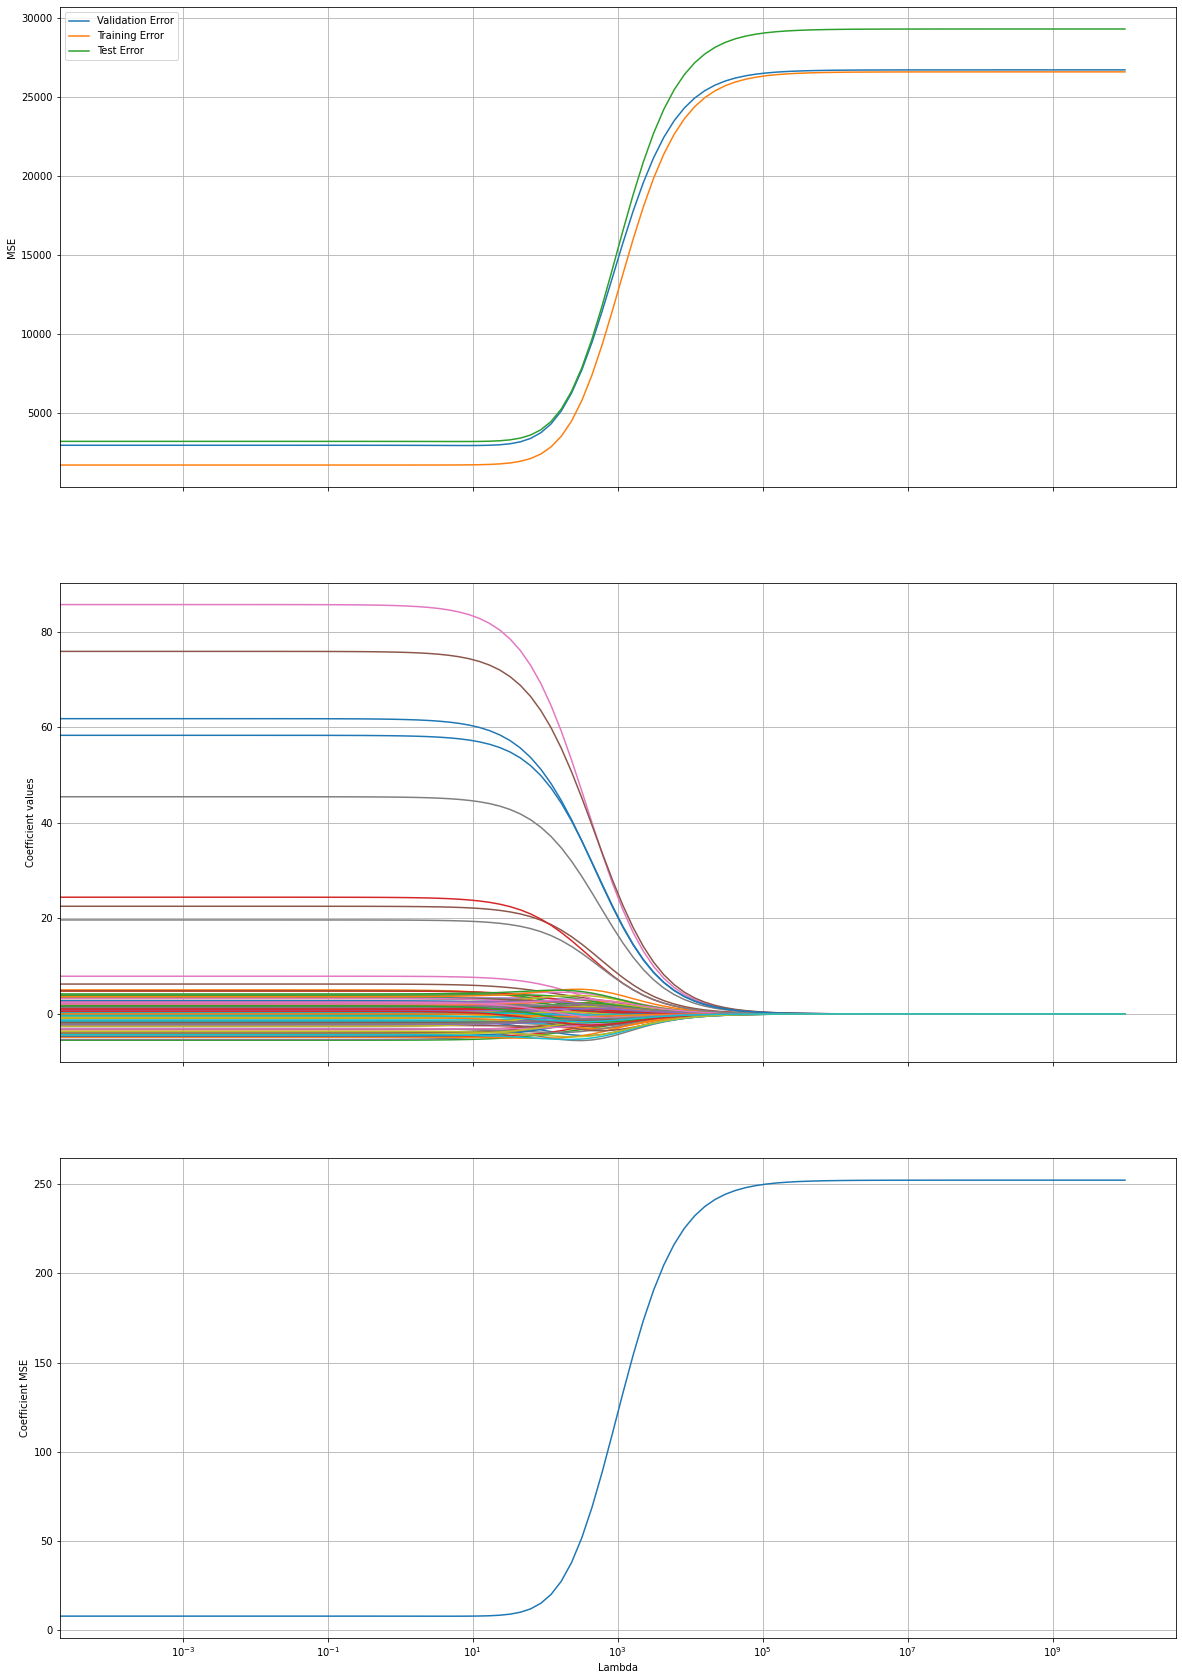

In [10]:
fig,ax = plt.subplots(3,1,figsize=(20,30),sharex=True)

ax[0].plot(lambda_list,validation_error,label="Validation Error")
ax[0].plot(lambda_list,training_error,label="Training Error")
ax[0].plot(lambda_list,test_error,label="Test Error")
ax[0].set_xscale('log')
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylabel("MSE")
#ax[0].set_ylim([2500,2750])

for i,c in enumerate(coefs.T):
    ax[1].plot(lambda_list,c)
ax[1].grid(True)
ax[1].set_ylabel("Coefficient values")

ax[2].plot(lambda_list,coef_error)
ax[2].grid(True)
ax[2].set_xlabel("Lambda")
ax[2].set_ylabel("Coefficient MSE")


In [11]:
minimum_at = np.argmin(test_error)
print("Lowest Test Error:",test_error[minimum_at])
print("Lambda with smallest test error:",lambda_list[minimum_at])
print("Lowest Validation Error:",validation_error[np.argmin(validation_error)])
print("Lambda with smallest Validation error:",lambda_list[np.argmin(validation_error)])
print("Lambda with smallest coefficient error:", lambda_list[np.argmin(coef_error)])

Lowest Test Error: 3176.2220162730237
Lambda with smallest test error: 6.4280731172843195
Lowest Validation Error: 2923.250057464588
Lambda with smallest Validation error: 8.902150854450374
Lambda with smallest coefficient error: 4.641588833612772


3.

implement Linear regression from scratch using 

- the closed form OLS

- the gradient descent

- (optional challenge) the closed form OLS using pseudo inverse

- LinearRegression() by sklearn. - please research which algorithm that sklearn use?

measure which one is faster, try to vary the n_features

so what do you think, closed_form or gradient descent?

use the same X y from #1

In [12]:
# Your code here
def closed_form(X,y):
    return np.linalg.inv(X.T@X)@X.T@y

In [110]:
import time

X_train_inserted = np.insert(X_train,0,1,axis=1)
X_test_inserted = np.insert(X_test,0,1,axis=1)

t0 = time.time()
print(closed_form(X_train_inserted,y_train))
t1 = time.time()
print("time =",t1-t0)

[ 1.48034125e+00  2.01495143e+00  5.03032662e+00 -6.60962479e-01
 -3.27420245e+00  3.37740267e+00  6.25141081e+00  7.89239866e+00
  1.63111276e+00 -9.21802116e-01  1.53823540e+00 -1.34013178e+00
 -1.78282418e+00 -5.50296224e+00 -4.76539258e+00 -1.94797611e+00
  2.25246592e+01  1.83795298e+00 -3.01853060e+00 -4.07603031e+00
  2.13108321e+00  1.86552564e-01  2.20653935e+00  4.84524080e+00
  5.16674507e-01 -3.80203747e-02 -1.74011829e+00  3.93419836e+00
 -5.33956185e+00 -1.59197192e+00 -1.28904801e+00  1.64058375e+00
 -2.54374412e+00  3.33795079e+00  4.78765217e+00  1.79980926e+00
 -3.98147400e+00  8.91830475e-01  1.10808688e+00  1.49524325e+00
 -7.73955473e-02  1.38493852e+00 -7.35840870e-01  3.93390936e+00
  6.60343697e-01  1.18850040e+00 -2.39337775e+00  1.81008227e+00
  4.54379161e+01  2.48302933e+00  3.33282803e+00  1.43980458e+00
  3.39140882e-01  2.49561805e+00  8.30781188e-01 -2.46276646e+00
  1.71599267e+00  8.56406034e+01 -3.14188391e+00 -2.55784881e+00
  1.17311513e-01  2.76858

In [111]:
class GD:
    def gradient(self,X, y, theta):
        grad = X.T@(X@theta-y)
        return grad
    
    def cost(self,theta, X, y):
        return (X@theta - y).T@(X@theta - y)/(2*y.size)
    
    def gradient_descent(self,X, y, theta_initial, alpha, num_iters):
        J_per_iter = np.zeros(num_iters)
        gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
        theta = theta_initial
        for i in np.arange(num_iters):
            grad = self.gradient(X, y, theta)
            theta = theta - alpha * grad
            J_per_iter[i] = self.cost(theta, X, y)
            gradient_per_iter[i] = grad.T
        return (theta, J_per_iter, gradient_per_iter)

In [112]:
alpha = 0.0001
iterations = 1100
theta_initial = np.zeros((X_train_inserted.shape[1]))

gd = GD()

t0 = time.time()
theta_gd, cost_gd, gradient_gd = gd.gradient_descent(X_train_inserted,y_train,theta_initial,alpha,iterations)

print(theta_gd)
t1 = time.time()
print("time =",t1-t0)

[ 1.48034125e+00  2.01495142e+00  5.03032662e+00 -6.60962484e-01
 -3.27420244e+00  3.37740267e+00  6.25141079e+00  7.89239868e+00
  1.63111277e+00 -9.21802127e-01  1.53823539e+00 -1.34013178e+00
 -1.78282418e+00 -5.50296224e+00 -4.76539260e+00 -1.94797611e+00
  2.25246593e+01  1.83795299e+00 -3.01853059e+00 -4.07603032e+00
  2.13108320e+00  1.86552552e-01  2.20653936e+00  4.84524079e+00
  5.16674498e-01 -3.80203501e-02 -1.74011829e+00  3.93419836e+00
 -5.33956184e+00 -1.59197193e+00 -1.28904801e+00  1.64058374e+00
 -2.54374412e+00  3.33795079e+00  4.78765216e+00  1.79980926e+00
 -3.98147399e+00  8.91830468e-01  1.10808689e+00  1.49524324e+00
 -7.73955518e-02  1.38493851e+00 -7.35840879e-01  3.93390937e+00
  6.60343708e-01  1.18850040e+00 -2.39337776e+00  1.81008226e+00
  4.54379161e+01  2.48302932e+00  3.33282804e+00  1.43980459e+00
  3.39140862e-01  2.49561804e+00  8.30781187e-01 -2.46276646e+00
  1.71599267e+00  8.56406034e+01 -3.14188391e+00 -2.55784879e+00
  1.17311505e-01  2.76858

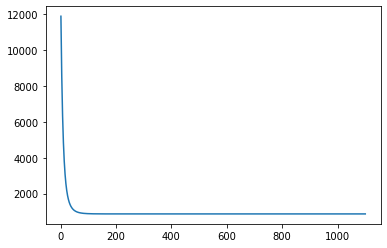

In [113]:
iter_series = np.arange(1,iterations+1)

plt.plot(iter_series,cost_gd)

In [114]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

t0 = time.time()
LR.fit(X_train,y_train)
print(np.insert(LR.coef_,0,LR.intercept_))
t1 = time.time()
print("time =",t1-t0)

[ 1.48034125e+00  2.01495143e+00  5.03032662e+00 -6.60962479e-01
 -3.27420245e+00  3.37740267e+00  6.25141081e+00  7.89239866e+00
  1.63111276e+00 -9.21802116e-01  1.53823540e+00 -1.34013178e+00
 -1.78282418e+00 -5.50296224e+00 -4.76539258e+00 -1.94797611e+00
  2.25246592e+01  1.83795298e+00 -3.01853060e+00 -4.07603031e+00
  2.13108321e+00  1.86552564e-01  2.20653935e+00  4.84524080e+00
  5.16674507e-01 -3.80203747e-02 -1.74011829e+00  3.93419836e+00
 -5.33956185e+00 -1.59197192e+00 -1.28904801e+00  1.64058375e+00
 -2.54374412e+00  3.33795079e+00  4.78765217e+00  1.79980926e+00
 -3.98147400e+00  8.91830475e-01  1.10808688e+00  1.49524325e+00
 -7.73955473e-02  1.38493852e+00 -7.35840870e-01  3.93390936e+00
  6.60343697e-01  1.18850040e+00 -2.39337775e+00  1.81008227e+00
  4.54379161e+01  2.48302933e+00  3.33282803e+00  1.43980458e+00
  3.39140882e-01  2.49561805e+00  8.30781188e-01 -2.46276646e+00
  1.71599267e+00  8.56406034e+01 -3.14188391e+00 -2.55784881e+00
  1.17311513e-01  2.76858

From reading through the internet sklearn uses the closed_form to solve for the optimal theta. Interestingly, using the sklearn library made the learning even faster than when I hard coded the learning algorithm myself. This is probably due to the code optimization which the library does. As well as using multiple cores at once when learning. 

4.

implement Ridge regression from scratch using 

 - the closed form OLS

 - stochastic gradient descent

 - SGDRegressor() of sklearn using penalty as l2

 - Ridge() by sklearn

loop through several lambda and print the MSE

compare the time as well

use the same X y from #1

In [119]:
# Your code here
def ridge_closed_form(X,y,l):
    return np.linalg.inv(X.T@X+np.eye(X.shape[1])*l)@X.T@y

def predict(X,theta):
    return X@theta

In [181]:
lambs = np.logspace(-5,5,10)
mse_closed_form = []
time_closed_form = []

for lamb in lambs:
    t0 = time.time()
    theta_closed = ridge_closed_form(X_train_inserted,y_train,lamb)
    #print(theta_closed)
    t1 = time.time()
    time_closed_form.append(t1-t0)
    print("time =",time_closed_form[-1])
    mse_closed_form.append(mean_squared_error(y_test,predict(X_test_inserted,theta_closed)))
    print(mse_closed_form[-1])
mse_closed_form = np.array(mse_closed_form)

time = 0.07218241691589355
3184.7074288663184
time = 0.016124963760375977
3184.707115143621
time = 0.0047512054443359375
3184.7030637998905
time = 0.01666545867919922
3184.650828862595
time = 0.0046885013580322266
3183.991202126153
time = 0.03457760810852051
3177.9142659075164
time = 0.0028650760650634766
3402.6706146809665
time = 0.03921318054199219
11584.84937151473
time = 0.0007760524749755859
25987.170225295995
time = 0.0010802745819091797
28775.922226952418


In [144]:
class ridge_solve:
    def gradient(self,X, y, theta,l):
        grad = X.T@(X@theta-y)+l*theta
        return grad
    
    def cost(self,theta, X, y,l):
        return (X@theta - y).T@(X@theta - y) + l*np.sum(theta**2)
    
    def gradient_descent(self,X, y, theta_initial, alpha, num_iters,l):
        J_per_iter = np.zeros(num_iters)
        gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
        theta = theta_initial
        for i in np.arange(num_iters):
            grad = self.gradient(X, y, theta,l)
            theta = theta - alpha * grad
            J_per_iter[i] = self.cost(theta, X, y,l)
            gradient_per_iter[i] = grad.T
        return (theta, J_per_iter, gradient_per_iter)
    
    def stochastic_gradient(self,X, y, theta,l,i):
        xi = X[i].reshape(1,-1)
        yi = y[i]

        grad = xi.T@(xi@theta-yi)*y.size+l*theta
        return grad
    
    def stochastic_gradient_descent(self,X, y, theta_initial, alpha, num_iters,l):
        tol = 0.001
        J_per_iter = np.zeros(num_iters+1)
        theta = theta_initial
        minJ = np.inf
        minJ_theta = theta_initial
        minJ_iter = 0
        ix = np.arange(0,y.size)
        np.random.shuffle(ix)
        for i in np.arange(num_iters):
            for n in ix:
                grad = self.stochastic_gradient(X, y, theta,l,n)
                theta = theta - alpha * grad
            J_per_iter[i+1] = self.cost(theta, X, y,l)
            if(J_per_iter[i+1] < minJ):
                minJ = J_per_iter[i+1]
                minJ_theta = theta
                minJ_iter = i+1
            if(np.abs(J_per_iter[i+1] - J_per_iter[i]) < tol):
                return(minJ_theta,J_per_iter)
        return (minJ_theta, J_per_iter)

In [183]:
rs = ridge_solve()

alpha = 0.000001
iterations = 1000

mse_SGD = []
time_SGD = []

for lamb in lambs:
    t0 = time.time()
    theta_sgd, cost_sgd = rs.stochastic_gradient_descent(X_train_inserted,y_train,theta_initial,alpha,iterations,lamb)
    #print(theta_sgd)
    t1 = time.time()
    time_SGD.append(t1-t0)
    print("time =",time_SGD[-1]) 
    mse_SGD.append(mean_squared_error(y_test,predict(X_test_inserted,theta_sgd)))
    print(mse_SGD[-1])
mse_SGD = np.array(mse_SGD)

time = 1.6970598697662354
3172.1952975309428
time = 1.6835744380950928
3199.7845017484624
time = 1.308319091796875
3187.0807467281757
time = 1.507890224456787
3190.2059092426744
time = 1.51157808303833
3200.0543731863927
time = 1.6934301853179932
3180.135867471084
time = 1.2907803058624268
3394.1526184080626
time = 0.610713005065918
11645.140281008971
time = 0.07239246368408203
25775.182167109422
time = 0.024289369583129883
28558.753399433925


from sklearn.linear_model import SGDRegressor

mse_SGDRegressor = []
time_SGDRegressor = []

for lamb in lambs:
    reg = SGDRegressor(max_iter=1000, tol=1e-2,alpha=lamb/y_train.size)
    t0 = time.time()
    reg.fit(X_train, y_train)
    t1 = time.time()
    time_SGDRegressor.append(t1-t0)
    print("time =",time_SGDRegressor[-1])
    mse_SGDRegressor.append(mean_squared_error(y_test,reg.predict(X_test)))
    print(mse_SGDRegressor[-1])
mse_SGDRegressor = np.array(mse_SGDRegressor)

In [185]:
mse_ridge = []
time_ridge = []
for lamb in lambs:
    ridge = Ridge(alpha = lamb,tol=1e-2)
    t0 = time.time()
    ridge.fit(X_train,y_train)
    t1 = time.time()
    time_ridge.append(t1-t0)
    print("time =",time_ridge[-1])
    mse_ridge.append(mean_squared_error(y_test,ridge.predict(X_test)))
    print(mse_ridge[-1])
mse_ridge = np.array(mse_ridge)

time = 0.004976034164428711
3184.7074290351184
time = 0.0015790462493896484
3184.707117323761
time = 0.001558065414428711
3184.7030919543445
time = 0.0015201568603515625
3184.6511919690565
time = 0.0016825199127197266
3183.9958052157926
time = 0.00151824951171875
3177.9603378151896
time = 0.0015306472778320312
3402.5682794681234
time = 0.0015268325805664062
11655.003542352699
time = 0.001495361328125
26212.852195409338
time = 0.0015430450439453125
29026.0308082586


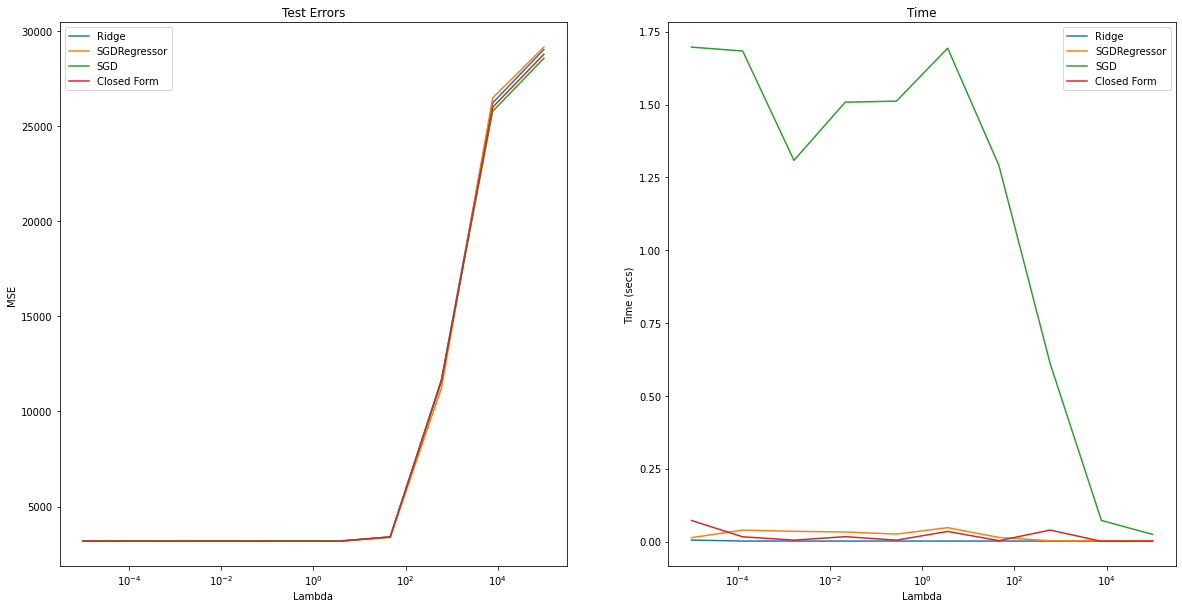

In [191]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(lambs,mse_ridge,label="Ridge")
ax[0].plot(lambs,mse_SGDRegressor,label="SGDRegressor")
ax[0].plot(lambs,mse_SGD,label="SGD")
ax[0].plot(lambs,mse_closed_form,label='Closed Form')
ax[0].set_xscale('log')
ax[0].set_ylabel("MSE")
ax[0].set_title("Test Errors")
ax[0].set_xlabel("Lambda")
ax[0].legend()

ax[1].plot(lambs,time_ridge,label="Ridge")
ax[1].plot(lambs,time_SGDRegressor,label="SGDRegressor")
ax[1].plot(lambs,time_SGD,label="SGD")
ax[1].plot(lambs,time_closed_form,label="Closed Form")
ax[1].set_xscale('log')
ax[1].set_title("Time")
ax[1].set_ylabel("Time (secs)")
ax[1].set_xlabel("Lambda")
ax[1].legend()

plt.show()


To conclude this assignment, It was quite difficult because it is my first time using sklearn but i definitely learnt alot by doing this assignment. I learnt that sklearn has many libraries that already optimizes lots of the code and it make the learning much faster than if we tried to write those code ourselves. One thing I noticed which I'd say is a flaw in the sklearn SGDRegressor library is that, the lambda is not scaled correctly. Therefore I had to use alpha = lambda/y.size to scale the lambda. If you try to insert alpha = lambda without diving it by y.size, it is essentially the same thing as using alpha = lambda\*size when doing batch gradient descent or the closed form. I also made the correct scaling in the SGD ridge regression which I wrote from scratch.